# **Sentiment Analysis Model By Mirza Yasir Abdullah Baig**

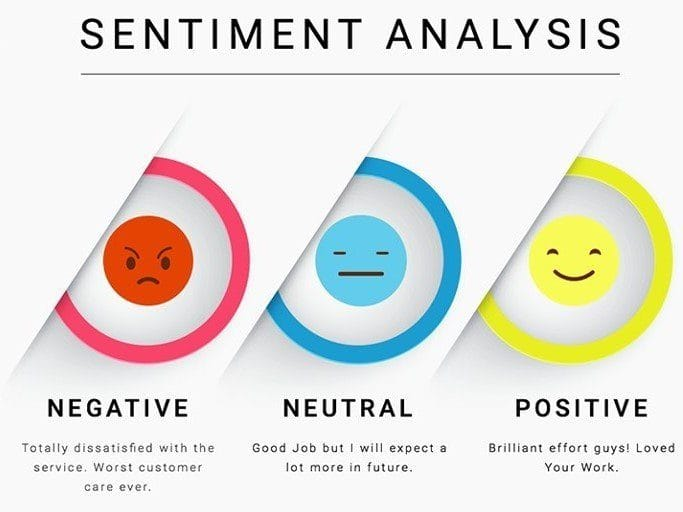

## **Step Number 1: Importing the Dependencies**

In [84]:
!pip install kaggle

In [85]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **Step Number 2: Data Collection- Kaggle API**

In [86]:
!pip install kaggle
import os
import json

# Load your kaggle.json
kaggle_dictionary = json.load(open("kaggle.json"))

os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

# Download the IMDB dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip the dataset
from zipfile import ZipFile
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


## **Step Number 3: Loading the Dataset**

In [87]:
import pandas as pd

data = pd.read_csv("/content/IMDB Dataset.csv")
print(data.shape)
data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [88]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-z0-9\s]", "", text)  # remove punctuation
    return text

data["clean_review"] = data["review"].apply(clean_text)
data.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [89]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape, test_data.shape)

(40000, 3) (10000, 3)


## **Step Number 4: Data Preprocessing**

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data["clean_review"])

X_train_seq = tokenizer.texts_to_sequences(train_data["clean_review"])
X_test_seq  = tokenizer.texts_to_sequences(test_data["clean_review"])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len)


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train_enc = le.fit_transform(train_data["sentiment"])
Y_test_enc  = le.transform(test_data["sentiment"])

# Check distribution
import pandas as pd
pd.Series(Y_train_enc).value_counts()


,count
0,20039
1,19961


## **Step Number 5: LSTM - Long Short-Term Memory**

In [93]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))  # no input_length
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))


In [95]:
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

## **Step Number 6: Training the Model**

In [97]:
history = model.fit(
    X_train_pad,
    Y_train_enc,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 323s 641ms/step - accuracy: 0.7437 - loss: 0.5175 - val_accuracy: 0.8384 - val_loss: 0.3746
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 308s 617ms/step - accuracy: 0.8612 - loss: 0.3390 - val_accuracy: 0.8639 - val_loss: 0.3296
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 307s 614ms/step - accuracy: 0.8742 - loss: 0.3098 - val_accuracy: 0.8566 - val_loss: 0.3411
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 308s 615ms/step - accuracy: 0.8871 - loss: 0.2792 - val_accuracy: 0.8376 - val_loss: 0.3805
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 308s 615ms/step - accuracy: 0.8836 - loss: 0.2845 - val_accuracy: 0.8685 - val_loss: 0.3239


## **Step Number 7: Model Evaluation**

In [98]:
loss, accuracy = model.evaluate(X_test_pad, Y_test_enc)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.8761 - loss: 0.3139
Test Loss: 0.31281355023384094
Test Accuracy: 0.8769000172615051


## **Step Number 8: Building a Predictive System**

In [99]:
def predict_sentiment(review):
    review_clean = clean_text(review)
    seq = tokenizer.texts_to_sequences([review_clean])
    padded_seq = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded_seq)
    return "positive" if pred[0][0] > 0.5 else "negative"

# Examples
reviews = [
    "This movie was fantastic. I loved it.",
    "This movie was not that good",
    "This movie was ok but not that good."
]

for r in reviews:
    print(f"Review: {r}")
    print(f"Sentiment: {predict_sentiment(r)}\n")


Review: This movie was fantastic. I loved it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Sentiment: positive

Review: This movie was not that good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Sentiment: negative

Review: This movie was ok but not that good.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Sentiment: negative



In [100]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
The sentiment of the review is: positive


In [101]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
The sentiment of the review is: negative


In [103]:
# example usage
new_review = "I love romantic movies. wow."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
The sentiment of the review is: positive


## **Step Number 9: Saving the Trained Model**

In [108]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [109]:
model.save("sentiment_model.keras")  # native Keras format

In [110]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)